<a href="https://colab.research.google.com/github/amisha949/Python_Projects/blob/main/Python_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Diwali Sales Data.csv", encoding="unicode_escape")

In [ ]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [ ]:
df.isna().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [ ]:
len(df)

11251

In [ ]:
df=df.drop(columns=["Status","unnamed1"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [ ]:
df["Amount"]=df["Amount"].replace(np.nan,0)

In [ ]:
df.isna().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [ ]:
df[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9443.527902
std,12.754122,1.115047,5228.684037
min,12.000000,1.000000,0.000000
25%,27.000000,1.500000,5440.000000
50%,33.000000,2.000000,8108.000000
75%,43.000000,3.000000,12671.000000
max,92.000000,4.000000,23952.000000


In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

**Gender**

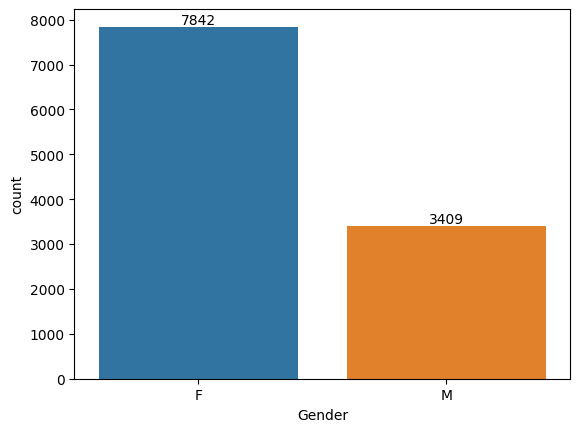

In [ ]:
num = sns.countplot(data=df, x="Gender" , hue="Gender")

for bars in num.containers:
    num.bar_label(bars)

In [ ]:
plot=df.groupby(["Gender"], as_index=False)["Amount"].sum()

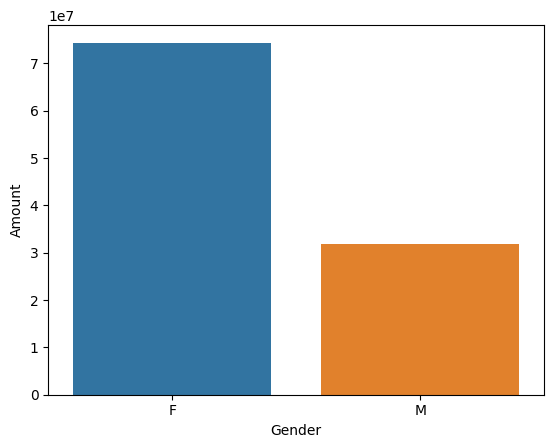

In [ ]:
ax=sns.barplot(data=plot, x="Gender", y="Amount" , hue= "Gender")

***From the above graph we understand that there are more female buyers than male.***

**Age**

<Axes: xlabel='Age Group', ylabel='count'>

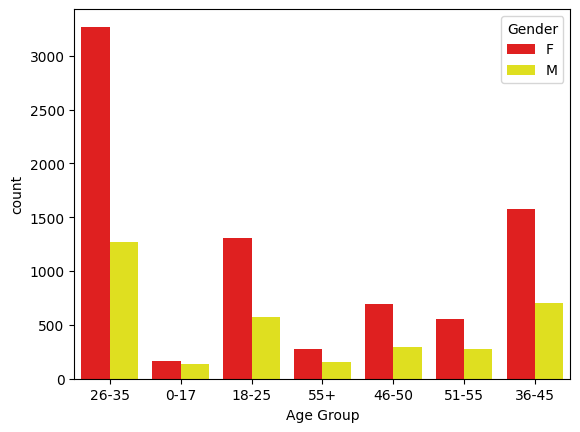

In [ ]:
sns.countplot(data=df, x="Age Group", hue="Gender" , palette=["red","yellow"])

In [103]:
df.groupby(["Age Group"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

,Age Group,Amount
2,26-35,42613443.94
3,36-45,22144995.49
1,18-25,17240732.00
4,46-50,9207844.00
5,51-55,8261477.00
6,55+,4080987.00
0,0-17,2699653.00


***From the above analysis the top three age group with high purchasing rate are 26-35, 36-35, 18-25***

**Marital Status**

<Axes: xlabel='Marital_Status', ylabel='count'>

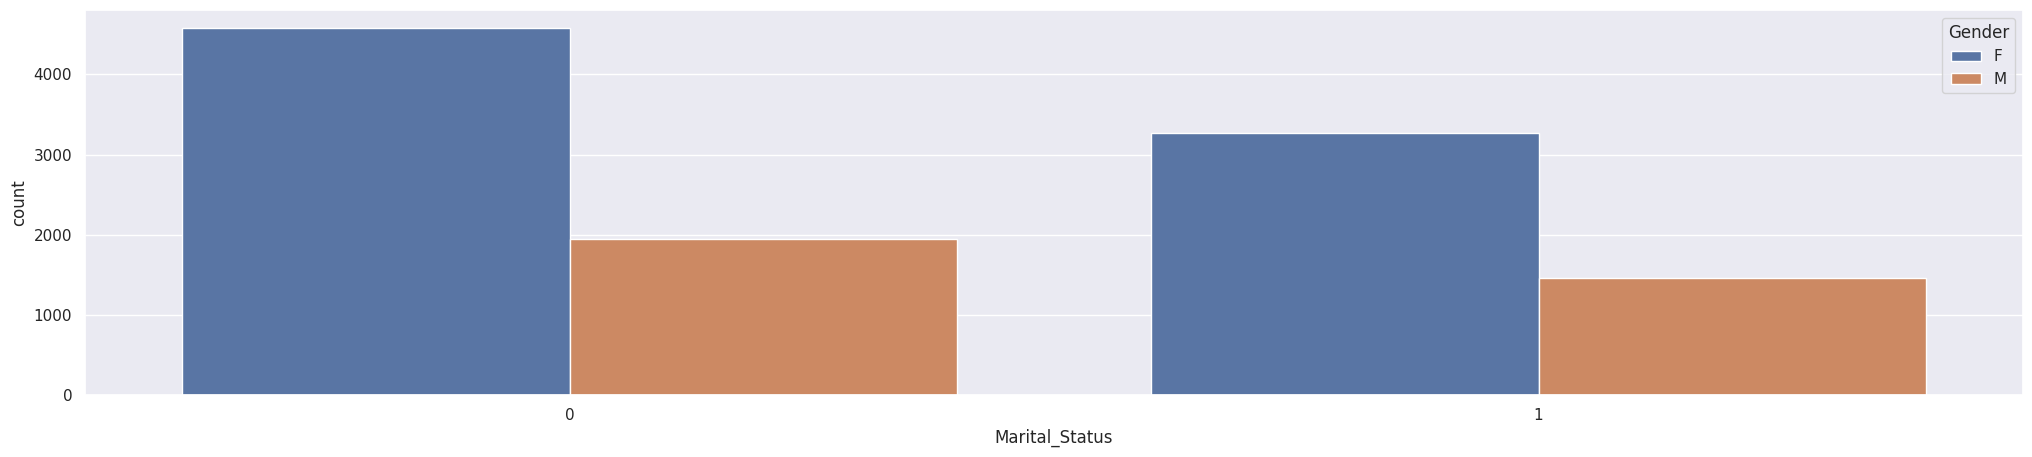

In [95]:
sns.countplot(data=df, x="Marital_Status", hue="Gender")

<Axes: xlabel='Marital_Status', ylabel='Amount'>

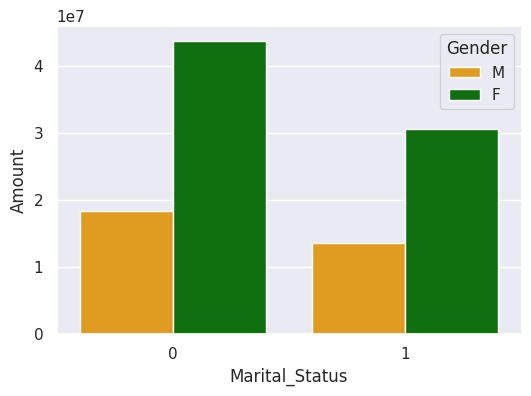

In [100]:
pll=df.groupby(["Marital_Status","Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount")
sns.set(rc={"figure.figsize":(6,4)})
sns.barplot(data=pll, x="Marital_Status", y="Amount", hue="Gender", palette=["orange","green"])

***From the above graph we understand that there are more married woman with high purchasing rate.***

**State**

In [ ]:
plot=df.groupby(["State","Gender"], as_index=False)["Orders"].sum().sort_values(by="Orders")

<Axes: xlabel='State', ylabel='Orders'>

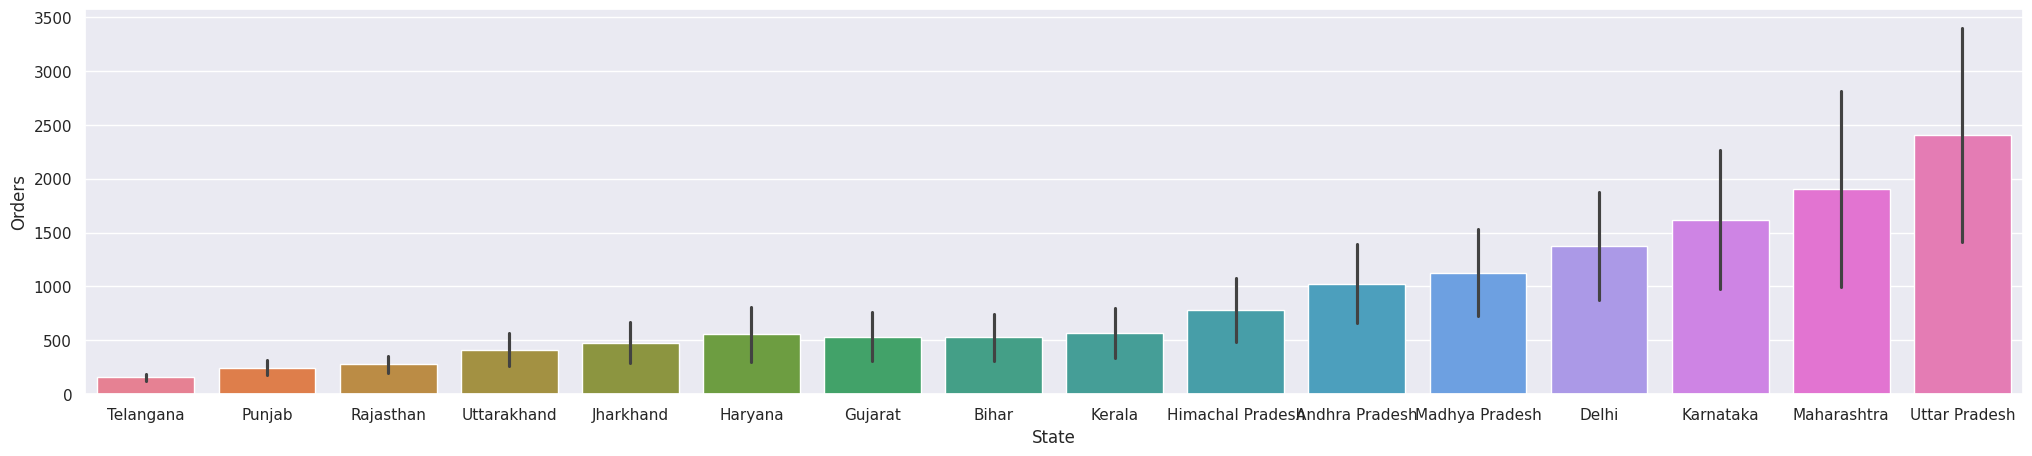

In [80]:
sns.set(rc={"figure.figsize":(25,5)})
sns.barplot(data=plot, x="State", y="Orders", hue="State")

**Top 10 States with high number of orders**

In [ ]:
df.groupby(["State"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending= False).head(10)

,State,Orders
14,Uttar Pradesh,4813
10,Maharashtra,3811
7,Karnataka,3241
2,Delhi,2744
9,Madhya Pradesh,2259
0,Andhra Pradesh,2054
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1070


***From the above graph we understand the top 5 states with high number of orders are Uttar Pradesh, Maharashtra, Karnataka, Delhi, Madhya Pradesh***

**Occupation**

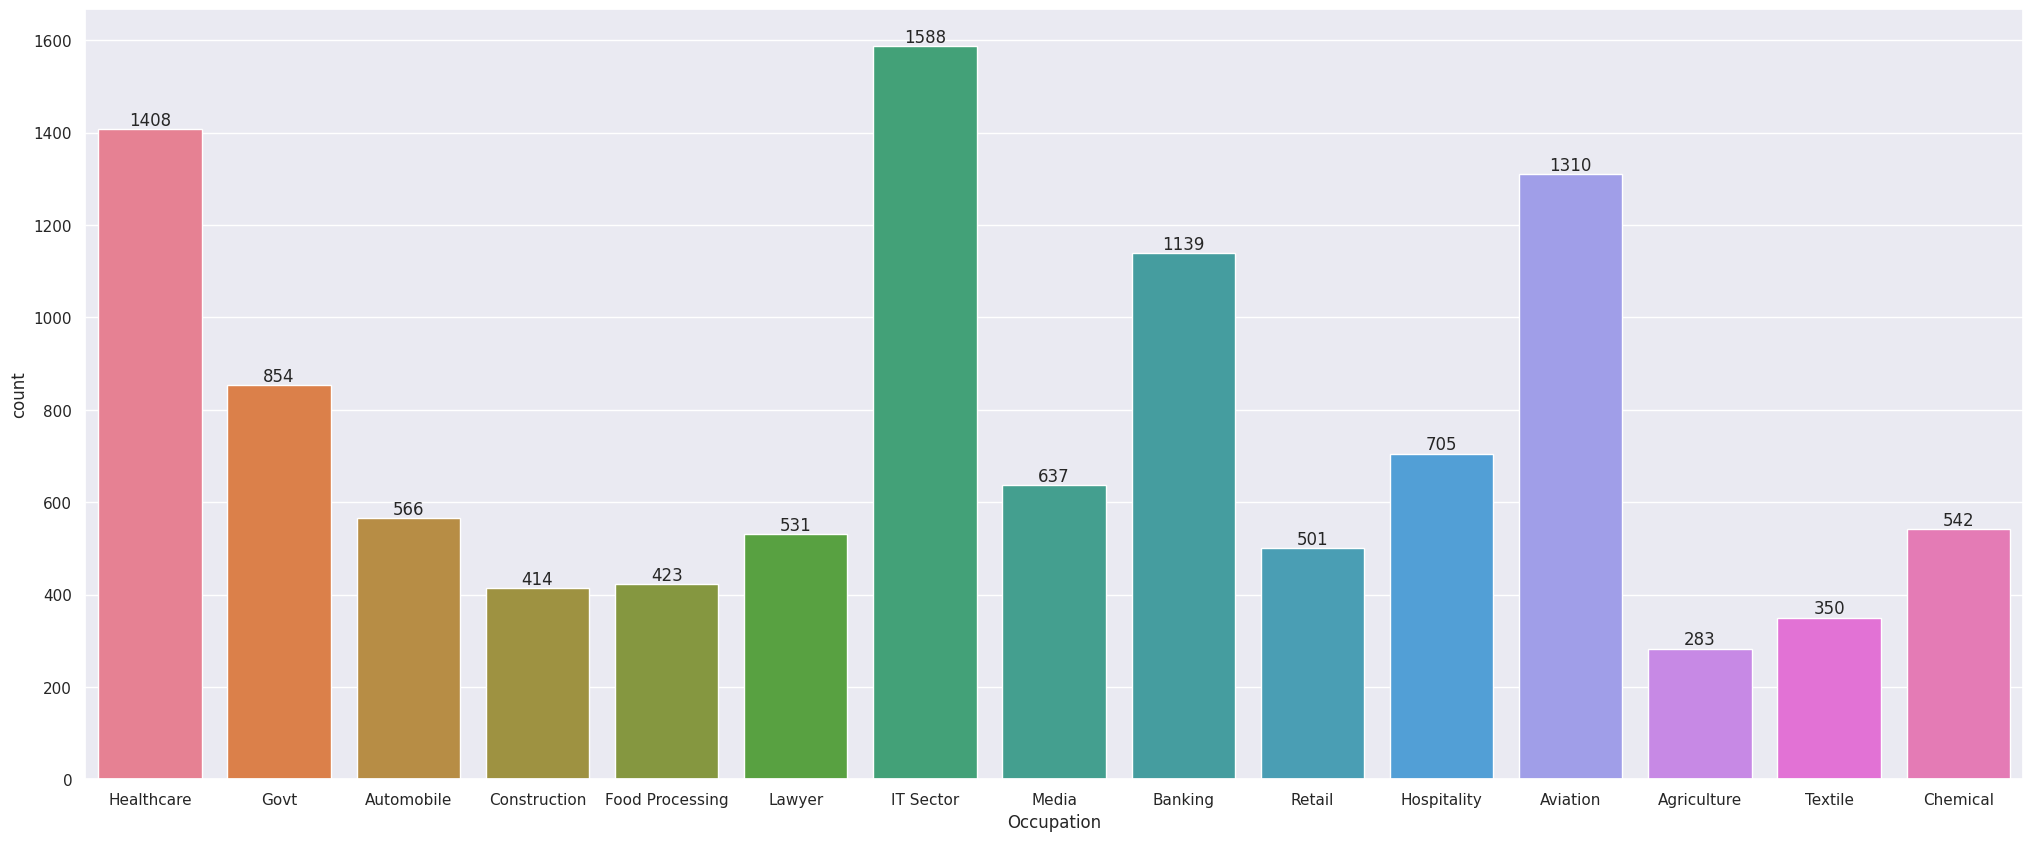

In [79]:
pl=sns.countplot(data=df, x="Occupation", hue="Occupation")
sns.set(rc={"figure.figsize":(25,10)})
for bars in pl.containers:
    pl.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

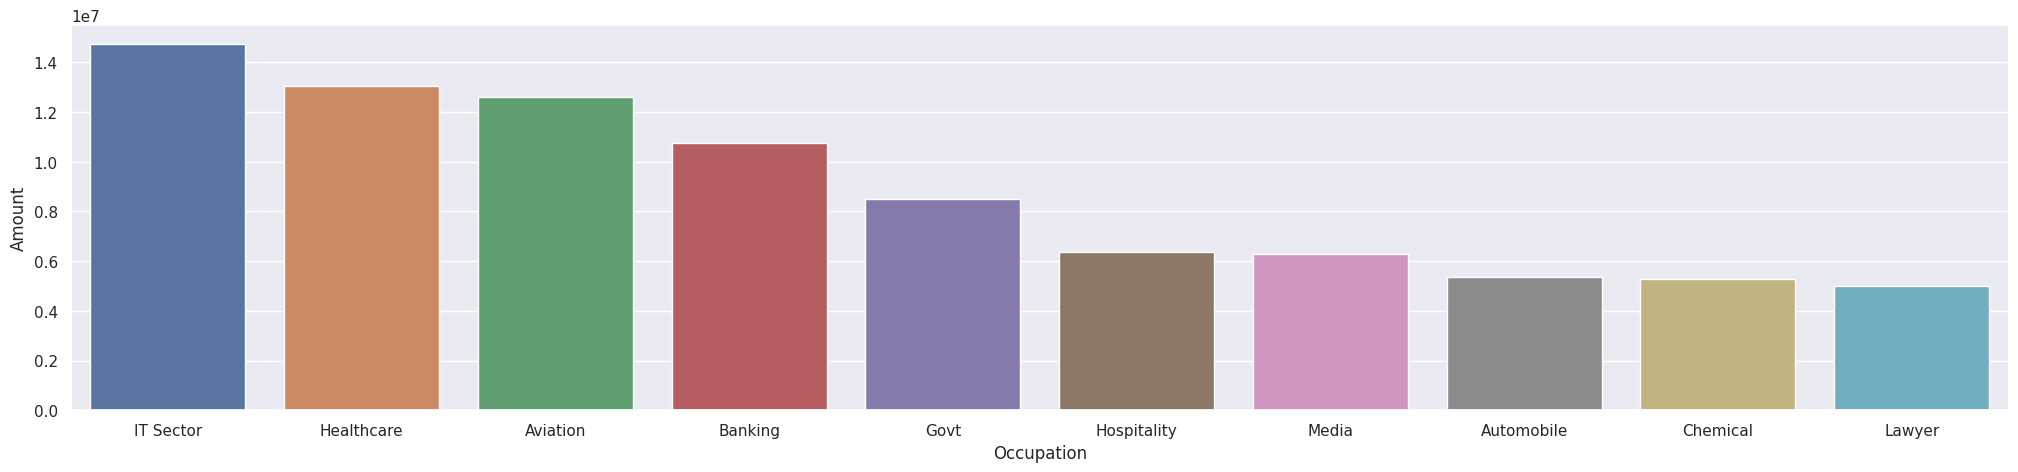

In [84]:
pl=df.groupby(["Occupation"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)
sns.barplot(data=pl, x="Occupation", y="Amount", hue="Occupation")

***From the above graph we understand that people from IT Sector, Healthcare, Aviation have high purchasing power***

**Product Category**

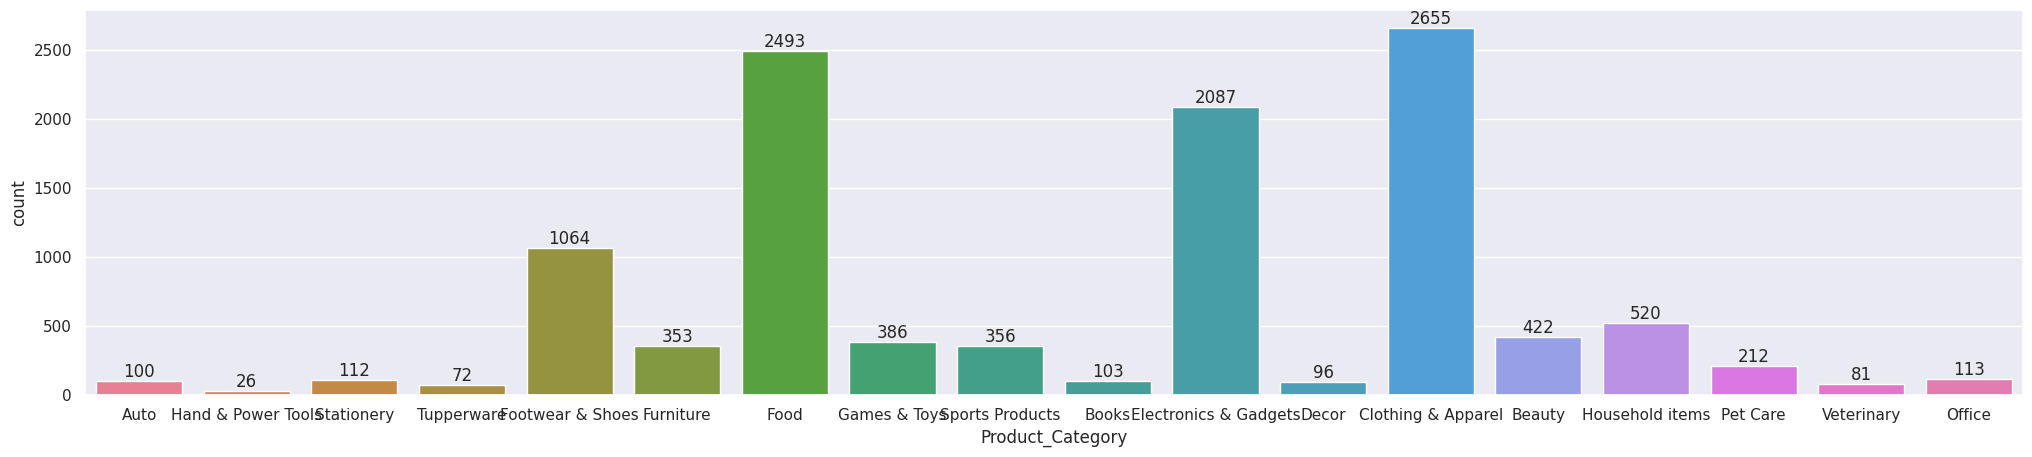

In [91]:
pl=sns.countplot(data=df, x="Product_Category", hue="Product_Category")
sns.set(rc={"figure.figsize":(25,5)})
for bars in pl.containers:
    pl.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Orders'>

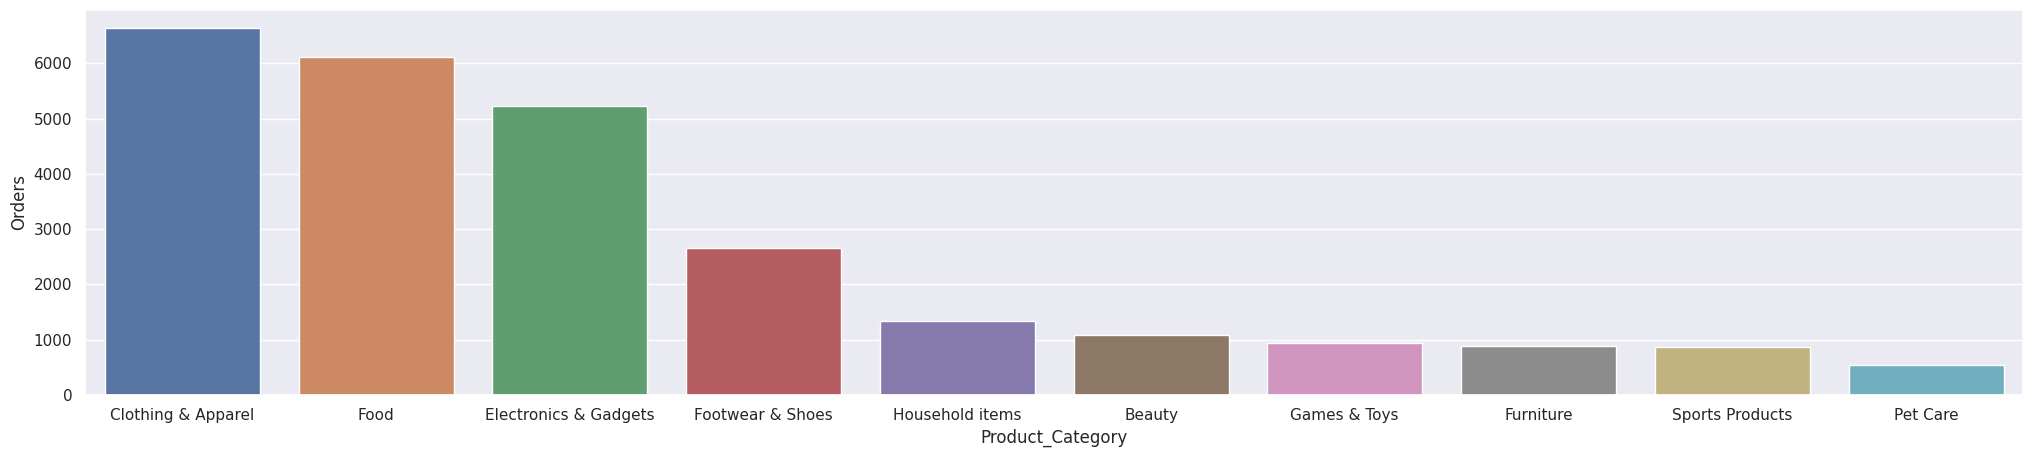

In [93]:
plt=df.groupby(["Product_Category"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)
sns.barplot(data=plt, x="Product_Category", y="Orders", hue="Product_Category")

***From the above graph we understand that there are more orders from the product category of Clothing and Apparel, Food, Electronics & Gadgets***

In [106]:
df.groupby(["Age Group","State","Occupation","Product_Category","Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)

,Age Group,State,Occupation,Product_Category,Gender,Amount
2888,26-35,Uttar Pradesh,Aviation,Food,F,446321.0
2626,26-35,Maharashtra,Healthcare,Food,F,418386.0
1697,26-35,Delhi,IT Sector,Footwear & Shoes,F,386671.0
3011,26-35,Uttar Pradesh,IT Sector,Food,F,378450.0
2227,26-35,Karnataka,IT Sector,Footwear & Shoes,F,326109.0
2980,26-35,Uttar Pradesh,Healthcare,Food,F,322249.0
2658,26-35,Maharashtra,IT Sector,Food,F,310897.0
2550,26-35,Maharashtra,Aviation,Food,F,265531.0
2142,26-35,Karnataka,Banking,Footwear & Shoes,F,260313.0
2567,26-35,Maharashtra,Banking,Food,F,245615.0


***Hence, we conclude that females from the age group of 26-35, state Uttar Pradesh, sector Aviation are more likely buy food.***